## In this section we estimate the $\rho$ - autoregressive component of the process $\theta$ when $\theta$ is the process of inflaton in Russia

### Findings

* We estimete $\rho$ for detrended data to be 0.72.
* In our estimations we used data from 2014 to 2021.
* To get autoregressive estimator we used MCMC methods offered by Turing.jl, so our estimate is normally distributed random variable.


In [1]:
using Turing, Distributions, StatsBase, DataFrames, CSV, HypothesisTests, LinearAlgebra

# Import MCMCChain, Plots and StatsPlots
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random

# Turn off progress monitor.
Turing.turnprogress(false)
pyplot()

┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1278
┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing C:\Users\evgen\.julia\packages\Turing\xGrY5\src\Turing.jl:24
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


Plots.PyPlotBackend()

In [2]:
# Inflation calculated by the Bank of Russia

infl = [6.23, 7.35, 7.58, 7.8, 7.44, 8.04, 8.29, 9.06, 11.36,
         14.96, 16.68, 16.9, 16.39, 15.78, 15.28, 15.65, 15.67, 15.59, 14.96, 12.9,
         9.76, 8.07, 7.27, 7.26, 7.31, 7.48, 7.22, 6.85, 6.41, 6.09, 5.79, 5.39,
         5.05, 4.61, 4.26, 4.26, 4.13, 4.09, 4.36, 3.85, 3.3, 2.98, 2.72, 2.48, 2.51,
         2.2, 2.18, 2.34, 2.4, 2.41, 2.27, 2.51, 3.07, 3.37, 3.54, 3.83, 4.26,
         4.97, 5.23, 5.25, 5.16, 5.13, 4.67, 4.57, 4.31, 4.0, 3.76, 3.54, 3.04,
          2.43, 2.3, 2.55, 3.1, 3.02, 3.21, 3.37, 3.58, 3.67, 3.99, 4.42, 4.9,
          5.19, 5.67, 5.79, 5.53, 6.02]

86-element Array{Float64,1}:
  6.23
  7.35
  7.58
  7.8
  7.44
  8.04
  8.29
  9.06
 11.36
 14.96
 16.68
 16.9
 16.39
  ⋮
  3.21
  3.37
  3.58
  3.67
  3.99
  4.42
  4.9
  5.19
  5.67
  5.79
  5.53
  6.02

In [3]:
ADFTest(infl, Symbol("constant"), 5) # From HypothesisTests package

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.02376580356731939

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4077

Details:
    sample size in regression:          80
    number of lags:                     5
    ADF statistic:                      -1.7456735147709934
    Critical values at 1%, 5%, and 10%: [-3.5087828609430614 -2.895783561573195 -2.5850381719848565]


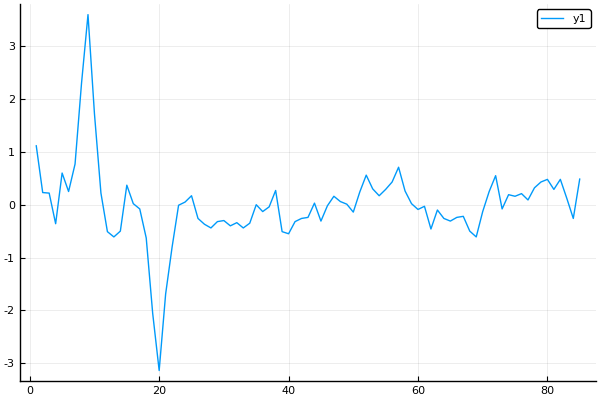

In [4]:
i_diff = diff(infl)
plot(i_diff)

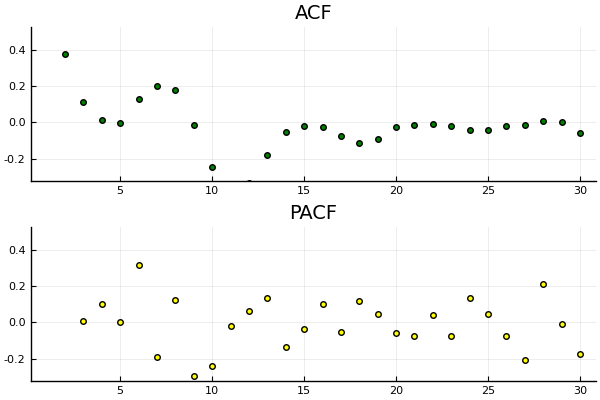

In [5]:
total_lags = 1:30
s1 = scatter(total_lags, autocor(i_diff, total_lags), title = "ACF", ylim = [-0.3,0.5], color = :green, legend = false)
s2 = scatter(total_lags, pacf(i_diff, total_lags), title = "PACF", ylim = [-0.3,0.5], color = :yellow, legend = false)
plot(s1, s2, layout = (2, 1))

In [6]:
@model ARIMA110(x) = begin
    T = length(x)
    μ ~ Uniform(-10, 10)
    ϕ ~ Uniform(-1, 1)
    for t in 3:T
        val = μ +                      # Drift term.
              x[t-1] +                 # ARIMA(0,1,0) portion.
              ϕ * (x[t-1] - x[t-2]) # ARIMA(1,0,0) portion.
        x[t] ~ Normal(val, 1)
    end
end
chain_ARIMA110 = sample(ARIMA110(infl), NUTS(200, 0.6), 1000)

┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference C:\Users\evgen\.julia\packages\Turing\xGrY5\src\inference\hmc.jl:547
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\evgen\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47


Object of type Chains, with data of type 800×14×1 Array{Union{Missing, Real},3}

Iterations        = 1:800
Thinning interval = 1
Chains            = 1
Samples per chain = 800
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = μ, ϕ

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean        │ std      │ naive_se   │ mcse       │
│     │ Symbol     │ Float64     │ Float64  │ Float64    │ Float64    │
├─────┼────────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1   │ μ          │ -0.00262741 │ 0.108703 │ 0.00384321 │ 0.00286425 │
│ 2   │ ϕ          │ 0.724743    │ 0.134608 │ 0.00475911 │ 0.00676881 │

Quantiles
. Omitted printing of 1 columns
│ Row │ parameters │ 2.5%      │ 25.0%      │ 50.0%       │ 75.0%     │
│     │ Symbol     │ Float64   │ F

In [7]:
describe(chain_ARIMA110)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean        │ std      │ naive_se   │ mcse       │
│     │ Symbol     │ Float64     │ Float64  │ Float64    │ Float64    │
├─────┼────────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1   │ μ          │ -0.00262741 │ 0.108703 │ 0.00384321 │ 0.00286425 │
│ 2   │ ϕ          │ 0.724743    │ 0.134608 │ 0.00475911 │ 0.00676881 │

Quantiles
. Omitted printing of 1 columns
│ Row │ parameters │ 2.5%      │ 25.0%      │ 50.0%       │ 75.0%     │
│     │ Symbol     │ Float64   │ Float64    │ Float64     │ Float64   │
├─────┼────────────┼───────────┼────────────┼─────────────┼───────────┤
│ 1   │ μ          │ -0.220972 │ -0.0787346 │ -0.00353108 │ 0.0683553 │
│ 2   │ ϕ          │ 0.428111  │ 0.639592   │ 0.736049    │ 0.814608  │


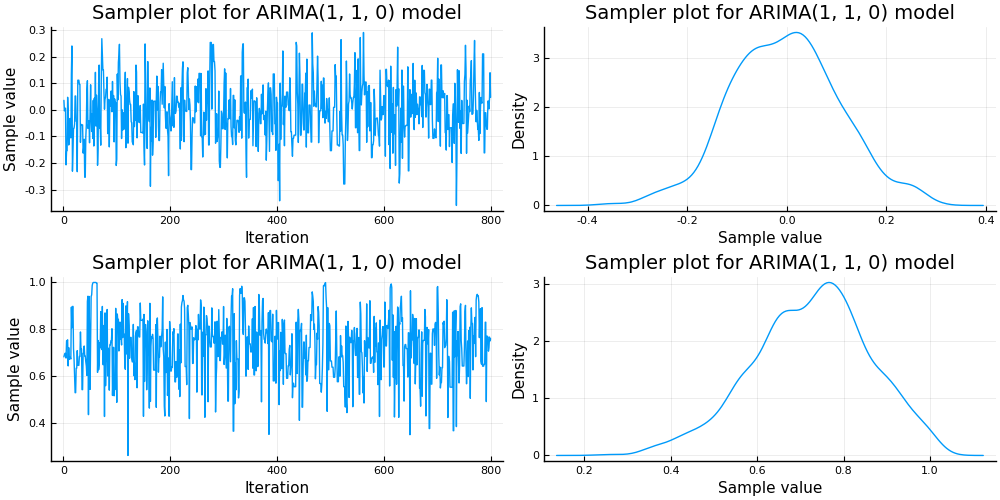

In [8]:
plot(chain_ARIMA110, title = "Sampler plot for ARIMA(1, 1, 0) model")

In [9]:
# phi = 0.72